In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams["figure.figsize"] = (12, 6)
sns.set()

In [2]:
main_data = pd.read_csv("indian_food.csv")
main_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


### Exploratory Data Analysis

#### Understand the data set

In [3]:
main_data.shape

(255, 9)

In [4]:
# first let's look at to the columns
main_data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

###### undserstand the features of data set
- here i will go through each columns

In [5]:
# let's look at the name column

main_data.name.nunique()
# so name is indicates the name of the indian food, here we have a 255 indian food

255

In [6]:
# let's remove space around name incase if the have

main_data.name = main_data.name.str.strip()

# let's convert name into lower case
main_data.name = main_data.name.str.lower()

In [7]:
# let's look at the ingredients

# ingredients which are used to make that particular dishes

In [8]:
# let's look at the diet

# diets can be vegetarian or Non vegetarian

main_data.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [9]:
# let's look at the prep time and cook time

# so prep time is preparation time of particular dish
# cook time is cooking time taken by particular dish to cook

In [10]:
# let's look at the flavor_profile

main_data.flavor_profile.value_counts()
# so flavor_profile indicates the flavor of the food
# here we have four types of flavor
# here we can see there are some NaN value as -1

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [11]:
# let's look at the course

main_data.course.value_counts()

# here course indicates that the cuisine is use as a main course or dessert or snack or starter

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [12]:
# let's look at to the state

main_data.state.unique()

# here are the state of india which indicates that the foods are famous or born in that particular state

# here we can see there are some NaN value as -1

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [13]:
# let's look at to the region

main_data.region.unique()

# here are the five region of the india which indicates where the state is belong

# here we can see there are some NaN value as -1

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

##### observation
###### so here we have 255 dishes and 9 columns associated with each of them which describe as follow
- name: name of the dish
- ingredients: ingredients which are used to make particular dish
- diet: It indicates that whether the dish is veg or non- veg
- prep_time: prepartion time
- cook_time: cooking time
- flavor_profile: flavor profile include that whether the dish is spicy or sweet etc
- course: course is a course of meal, the course might be main course, snack or dessert etc
- state: state where the dish is famous or born
- region: region where the state belongs

In [14]:
# let's check the NaN value

main_data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [15]:
# here is NaN value in region columns

main_data[main_data.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [16]:
# so above i can see that there is a NaN value which has state is Uttar Pradesh
# so find that what is the region value where the state is Uttar Pradesh

main_data.loc[main_data.state == "Uttar Pradesh"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North


In [17]:
# so here we can see region is North whenver the state is Uttar Pradesh
# let's fill that NaN value of region as a North 

main_data.region.fillna("North", inplace = True)

##### EDA of DIet

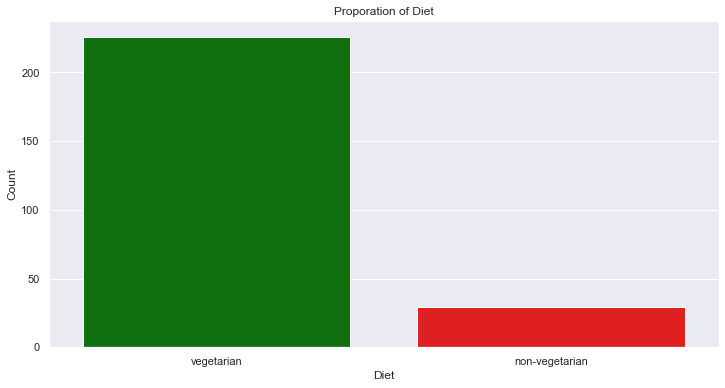

In [18]:
# let's look at to the diet

# let's replace non vegetarian to non-vaegetarian for ease of access
main_data.diet = main_data.diet.str.replace(" ", "-")

sns.countplot(data = main_data, x = "diet", palette = ["green", "red"])
plt.xlabel("Diet")
plt.ylabel("Count")
plt.title("Proporation of Diet")
plt.show()

###### observation: here vegetarian dishes are more than non - vegetarian

###### EDA of flavor_profile

In [19]:
main_data.flavor_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [20]:
# we don't have any NaN value in flavor_profile but we have a -1 value in flavor profile which is likely to NaN
# so we fill that -1 to other, it's call other flavor

# so whenever it has "-1" in flavor_profile we replace it to with other

main_data.flavor_profile = main_data.flavor_profile.replace("-1", "other")

In [21]:
main_data.flavor_profile.value_counts()

spicy     133
sweet      88
other      29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

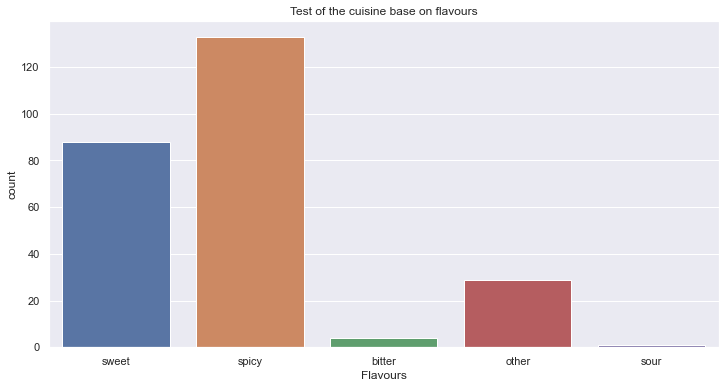

In [22]:
# let's plot flavor_profile

sns.countplot(data = main_data, x = "flavor_profile")
plt.xlabel("Flavours")
plt.title("Test of the cuisine base on flavours")
plt.show()

###### observation: Indian are usually like spicy and sweet food

##### EDA of course

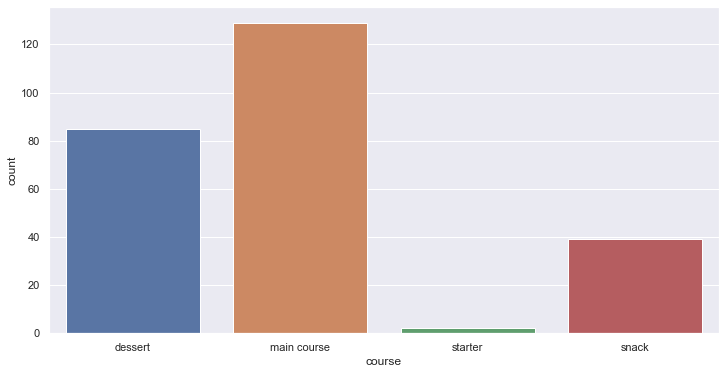

In [23]:
# let's look at the course 
# here course are main course which usually we take at a lunch and dinner time
# dessert is a sweet basically which we take a usually after lunch and dinner
# there also some snack and starter

sns.countplot(data = main_data, x = "course")
plt.show()

###### observation: Dishes of Main Course and Dessert are hudge

##### EDA of state

In [24]:
# let's look at the state
# state doesn't have and NaN value but state have a -1 value which is likely to NaN value
# so here 24 -1 means we have 24  NaN values
main_data.state.value_counts().head()

Gujarat        35
Punjab         32
Maharashtra    30
West Bengal    24
-1             24
Name: state, dtype: int64

In [25]:
# let's look at the data where the state value is "-1"

main_data.loc[main_data.state == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1


In [26]:
# so i research this on internet and i found that there are some of the dishes which are famous and common to
# all the over the state of india
# so to prevent this outlier i replace "-1" with All State

main_data.state = main_data.state.replace("-1", "All State")

In [27]:
# let's find out number of state

main_data.state.nunique() - 1
# here we have a total 24 unique states

24

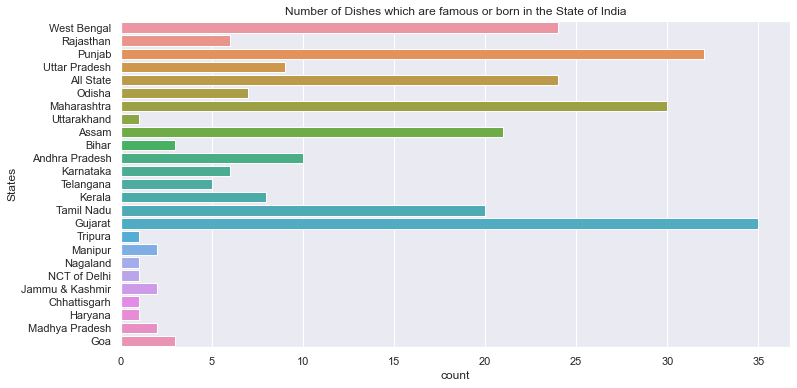

In [28]:
# let's plot the number of dishes are famous or born in particular state of india

sns.countplot(data = main_data, y = "state")
plt.title("Number of Dishes which are famous or born in the State of India")
plt.ylabel("States")
plt.show()

###### observation: Diffierent states has a diffeirent cuisine but Gujarat has a highest cuisine

##### EDA of Region

In [29]:
# let's look at the region
main_data.region.value_counts()

West          74
South         59
North         50
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [30]:
# In region columns we don't have any NaN value but we have a -1 value which likely to NaN value

# let's look at the data where Region is -1

main_data[main_data.region == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,All State,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,All State,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,All State,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,All State,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,All State,-1


In [31]:
# so i research this on internet and i found that there are some of the dishes which are famous and common to
# all the over the india
# so to prevent this outlier i replace "-1" with All Region

main_data.region = main_data.region.replace("-1", "All Region")

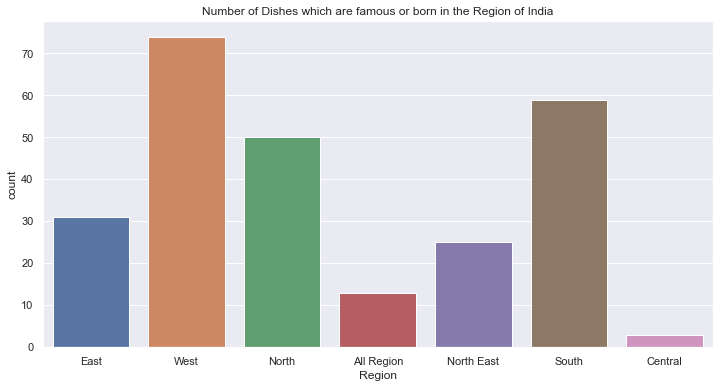

In [32]:
# let's plot number of dishes are famous in particular region of india

sns.countplot(data = main_data, x = "region")
plt.title("Number of Dishes which are famous or born in the Region of India")
plt.xlabel("Region")
plt.show()

###### observation: Here different dishes are coming from different region of india but most of the dishes are coming from West and South side

##### EDA of prep time and cook time

In [33]:
# let's look at the prep time
main_data.prep_time.unique()

array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
       120,  60, 500, 150, 360, 495,  70,  35,  12], dtype=int64)

In [34]:
# in prep time i found that there are -1 value which is our outlier in this case

# let's look at the data where prep time is -1

main_data.loc[main_data.prep_time == -1].head()

# here are some dishes which i don't have any prep time, i'll solve it later

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


In [35]:
# let's look at th cook time

main_data.cook_time.unique()

array([ 25,  30,  60,  40,  50,  20,   5,  45, 120,  35,  90,  75,  15,
       720,  55,  -1,  10,   2,   6], dtype=int64)

In [36]:
# in cook time i found that there are value -1 which is outlier

# let's look at the data where cook time value is -1

main_data.loc[main_data.cook_time == -1].head()
# here some of dishes which i don't have a cook time, i will solve it later

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


<AxesSubplot:xlabel='prep_time', ylabel='cook_time'>

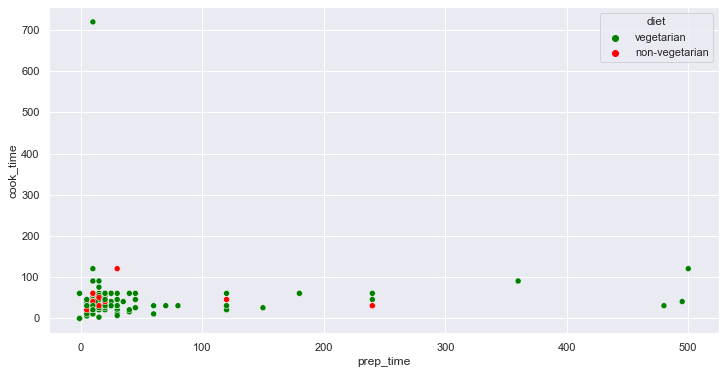

In [37]:
# let's plot prep time and cook time

sns.scatterplot(data = main_data, x = "prep_time", y = "cook_time",hue = "diet", palette=["green", "red"])

###### observation: veg and non-veg dishes take a similar amount of time

##### EDA of Ingredients

In [38]:
# let's look at to the ingrediets which are used to make a particular dish

# first let's convert all ingredients into lower case for preventing case sensitive
main_data.ingredients = main_data.ingredients.str.lower()
# so here ingredients are a comman seprated
# let's split those ingredits and divide into veg and non-veg proporation

veg_ingredients = main_data.loc[main_data.diet == "vegetarian", "ingredients"]
non_veg_ingredients = main_data.loc[main_data.diet == "non-vegetarian", "ingredients"]

# let's check size of both ingredients and verify the whether the ingredients of all dishes are stored or not
# our total dishes are 255
veg_ingredients.size + non_veg_ingredients.size

255

In [39]:
veg_ingredients.str.split(",")

0                   [maida flour,  yogurt,  oil,  sugar]
1                            [gram flour,  ghee,  sugar]
2      [carrots,  milk,  sugar,  ghee,  cashews,  rai...
3      [flour,  ghee,  kewra,  milk,  clarified butte...
4      [milk powder,  plain flour,  baking powder,  g...
                             ...                        
250          [glutinous rice,  black sesame seeds,  gur]
251    [coconut milk,  egg yolks,  clarified butter, ...
252    [cottage cheese,  dry dates,  dried rose petal...
253    [milk powder,  dry fruits,  arrowroot powder, ...
254    [brown rice,  fennel seeds,  grated coconut,  ...
Name: ingredients, Length: 226, dtype: object

In [40]:
# let's count those ingredients for getting that how many dishes are used that particular ingrediets

# let's remove unnecessary space

veg_ingredients = veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []

for i in veg_ingredients.str.split(","): # split by "," & iterate through all the ingredients and append it to list
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):#split by , & iterate through all the ingredients and append it to list
    non_veg_cleaned_ingredients += i

In [41]:
# let's make a series of veg and non veg ingredients

final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many tim ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

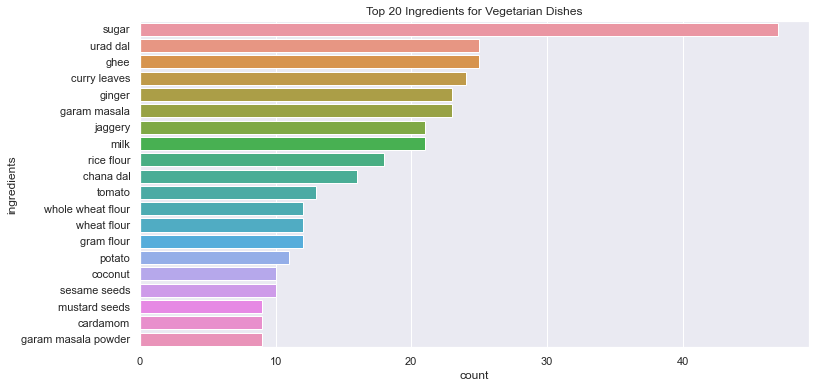

In [42]:
# let's plot a top 20 vegetarian ingredients

sns.barplot(data = final_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Vegetarian Dishes")
plt.show()

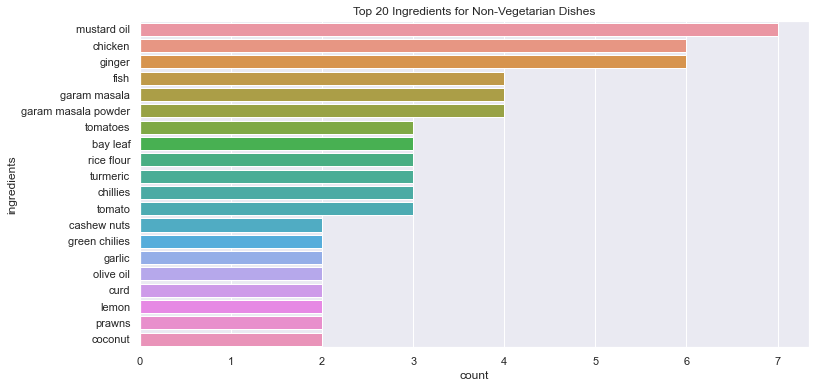

In [43]:
# let's plot top 20 no vegetarian ingredients

sns.barplot(data = final_non_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Non-Vegetarian Dishes")
plt.show()

###### observation: most of the ingredients are different in vegetarian and non-vegetarian dishes

### Feature Engineering

###### here i take all the features except prep_time and cook_time because there are some value missing in prep _time and cook_time features

In [44]:
# features i have to take all are categorical features so let's transform it into numeric using one hot encoding

data = main_data.copy()
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


##### feature selection of ingredients
- Here I have a so many ingredients which are used in indian cuisine
- I take only top 20 vegetarian ingredients and top 20 non-vegetarian ingredients as my features

In [45]:
# let's take top 20 veg and non-veg ingredients and merge it and make our final ingredient feature

top_veg_ingredients = final_veg_ingredients.head(20)
top_non_veg_ingredients = final_non_veg_ingredients.head(20)

# here let's append both and make our final ingredients

final_ingredients = top_veg_ingredients.append(top_non_veg_ingredients).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,urad dal,25
2,ghee,25
3,curry leaves,24
4,ginger,23


In [46]:
# here i took a ingredients separately from vegetarian and non vegetarian so that might be chance that it has some
# duplicate ingredients so let's check it

final_ingredients[final_ingredients.ingredients.duplicated(keep = False)]

,ingredients,count
4,ginger,23
5,garam masala,23
8,rice flour,18
10,tomato,13
15,coconut,10
19,garam masala powder,9
22,ginger,6
24,garam masala,4
25,garam masala powder,4
28,rice flour,3


In [47]:
# so here i can see that some of the ingredients are found as duplicated so let's merge it using group by

final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()

# let's sort it by count

final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ginger,29
2,garam masala,27
3,urad dal,25
4,ghee,25


In [48]:
# let's find out the total ingredients

final_ingredients.ingredients.nunique()
# so we have total 35 ingredients

34

In [49]:
# now let's do one hot encoding to ingredients
# so here in our data set i have a comma separated ingredients so i use contain() of string to match
# our final ingredients and if it is found then i put 1 other wise 0


for i in final_ingredients.ingredients:
    data[i] = 0 # here i create a column of particular ingredients and assign all value as 0
    data.loc[data.ingredients.str.contains(i), [i]] = 1
    # above i put 1 on that column which dishes has include that particular ingredients

In [50]:
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,chillies,turmeric,tomatoes,cashew nuts,garlic,curd,green chilies,olive oil,lemon,prawns
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0


##### feature selection of diet

In [51]:
# let's encode veg and non veg using label encoding

# here i drop first column which is non vegetarian for preventing dummy variable trap
diet_encoding = pd.get_dummies(main_data.diet, drop_first=True)
diet_encoding.head()

,vegetarian
0,1
1,1
2,1
3,1
4,1


In [52]:
# now let's concat it with our "data" data frame

data = pd.concat([data, diet_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,turmeric,tomatoes,cashew nuts,garlic,curd,green chilies,olive oil,lemon,prawns,vegetarian
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


###### feature selection of flavor_profile

In [53]:
# let's encode flavor_profile using one hot encoding

# here i drop a first column which is bitter for preventing dummy variable trap
flavor_profile_encoding = pd.get_dummies(main_data.flavor_profile, drop_first=True)
flavor_profile_encoding.head(2)

,other,sour,spicy,sweet
0,0,0,0,1
1,0,0,0,1


In [54]:
# now let's concat it with our main "data" data frame

data = pd.concat([data, flavor_profile_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,curd,green chilies,olive oil,lemon,prawns,vegetarian,other,sour,spicy,sweet
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,1,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,1,0,0,0,1


###### feature selection of course

In [55]:
# let's encode course using one hot encoding

# here i drop first column which is dessert for preventing dummy variable trap
course_encoding = pd.get_dummies(main_data.course, drop_first = True)
course_encoding.head(2)

,main course,snack,starter
0,0,0,0
1,0,0,0


In [56]:
# let's concat it with our main "data" data frame

data = pd.concat([data, course_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,lemon,prawns,vegetarian,other,sour,spicy,sweet,main course,snack,starter
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,1,0,0,0,1,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,1,0,0,0,1,0,0,0


##### feature selection of state

In [57]:
# let's encode the state using one hot encoding

# here i drop first column which is All State for preventing dummy variable trap
state_encoding = pd.get_dummies(main_data.state, drop_first = True)
state_encoding.head(2)

,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# let's concat it with our main "data" data frame

data = pd.concat([data, state_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,1,0,0,0,0,0,0


###### feature selection region

In [59]:
# let's encode region using one hot encoding

# here i drop first column which is All Region for preventing dummy variable trap
region_encoding = pd.get_dummies(main_data.region, drop_first = True)
region_encoding.head(2)

,Central,East,North,North East,South,West
0,0,1,0,0,0,0
1,0,0,0,0,0,1


In [60]:
# let's concat it with main "data" data frame

data = pd.concat([data, region_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


###### creating final data frame

In [61]:
# let's create a final data frame
# let's remove unnecessary columns which are not required not and store it as final_data

final_data = data.drop(columns = ['ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'])

final_data.head()

,name,sugar,ginger,garam masala,urad dal,ghee,curry leaves,jaggery,rice flour,milk,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,boondi,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,gajar ka halwa,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,ghevar,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,gulab jamun,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [62]:
# here i'm going to use Nearest Neighbors using cosine similarity so for model purpose let's take name column
# as a index

final_data.set_index("name", inplace = True)
final_data.head()

,sugar,ginger,garam masala,urad dal,ghee,curry leaves,jaggery,rice flour,milk,chana dal,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
name,,,,,,,,,,,,,,,,,,,,,
balu shahi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
boondi,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
gajar ka halwa,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
ghevar,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
gulab jamun,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### Model Builiding

In [63]:
# here i'm going to use cosine similarity for recommend the cuisine
# cosine similarity is nothing but a degree between two data points or two similar type of data

# here i'm going to use Nearest Neighbors for implementing cosine distance
# consine distance = 1 - consine similarity

# here i use Nearest Neighbors with metric cosine and brute algorithm

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = "cosine", algorithm = "brute")
model.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [64]:
# now our model is ready so let's test it

picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

'chevdo'

In [65]:
# now let's find similarity or recommened cuisine using our model
# our model return distance and index
# distance is indicates that how far that similarity of that recommended cuisine with our picked cuisine
# index indicates a index of our final data which is a name of cuisine

# here i want 10 recommended cuisine for my picked cuisine

distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)

In [66]:
distance

array([[0.        , 0.08712907, 0.08712907, 0.16666667, 0.16666667,
        0.22848325, 0.22848325, 0.22848325, 0.22848325, 0.22848325,
        0.22848325]])

In [67]:
cuisine_index

array([[174, 185, 178, 215, 205, 214, 199, 218, 186, 181, 203]],
      dtype=int64)

In [68]:
# let's print it in proper way

# these are 2D arrays so let's convert it into 1D

distance = distance.flatten()
cuisine_index = cuisine_index.flatten()

# probably first one is always our picked cuisine

print("Recommendation for ", picked_cuisine, " are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

Recommendation for  chevdo  are following
1 .  ghooghra  with distance  0.0871290708247231
2 .  kutchi dabeli  with distance  0.0871290708247231
3 .  thepla  with distance  0.1666666666666664
4 .  namakpara  with distance  0.1666666666666664
5 .  khichu  with distance  0.2284832501895404
6 .  patra  with distance  0.2284832501895404
7 .  turiya patra vatana sabji  with distance  0.2284832501895404
8 .  handwo  with distance  0.2284832501895404
9 .  dhokla  with distance  0.2284832501895404
10 .  sev khamani  with distance  0.2284832501895404


In [69]:
# let's export our main data for showing data on web app
main_data.to_csv("cleaned_data.csv", index = False)

# let's export our final_data, it will used on frontend for getting recommendation
final_data.to_csv("model_data.csv")

In [70]:
# let's export model using pickle file

import pickle

with open("model.pickle", "wb") as f:
    pickle.dump(model, f)